## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('./QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [21]:
df.tail()

,DATE,TAG,POSTS
2239,2022-01-01 00:00:00,r,4457
2240,2022-01-01 00:00:00,go,892
2241,2022-01-01 00:00:00,python,25098
2242,2022-01-01 00:00:00,ruby,501
2243,2022-01-01 00:00:00,swift,2195


In [22]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,164
3,2008-08-01 00:00:00,c,83
4,2008-08-01 00:00:00,python,122


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [23]:
df.shape

(2244, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [3]:
df.isna()

,DATE,TAG,POSTS
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2239,False,False,False
2240,False,False,False
2241,False,False,False
2242,False,False,False


In [4]:
clean_df = df.dropna()
clean_df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,164
3,2008-08-01 00:00:00,c,83
4,2008-08-01 00:00:00,python,122


In [5]:
clean_df.count()

DATE     2244
TAG      2244
POSTS    2244
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [5]:
each_prog_lang = clean_df['TAG'].unique()
total_posts_list = []
lang_list = []
for i in each_prog_lang:
  lang_list.append(i)
  result = clean_df.loc[clean_df['TAG'] == i]
  print(result)
  total_posts = result['POSTS'].sum()
  print(f'Total posts for {i} is {total_posts}.')
  total_posts_list.append(total_posts)
  print(total_posts_list)
  print(lang_list)
  print(max(total_posts_list))
  index_of_max_posts = total_posts_list.index(max(total_posts_list))
  print(index_of_max_posts)
  print(f'The most popular programming language is {lang_list[index_of_max_posts].title()} because it got the highest amount of posts as in {max(total_posts_list)} posts.')
  new_total_posts_list = total_posts_list.copy()
  new_total_posts_list.sort(reverse=True)
  print(new_total_posts_list)
  second_most_popular_lang_index_num = 0
  for i in new_total_posts_list:
    if new_total_posts_list.index(i) == 1:
      second_most_popular_lang_index_num = new_total_posts_list.index(i)
  print(second_most_popular_lang_index_num)
  index_of_second_to_max_posts = total_posts_list.index(new_total_posts_list[second_most_popular_lang_index_num])
  print(index_of_second_to_max_posts)
  print(f'The second most popular programming language is {lang_list[index_of_second_to_max_posts].title()} because it got the second highest amount of posts as in {new_total_posts_list[second_most_popular_lang_index_num]} posts.')


                     DATE TAG  POSTS
0     2008-07-01 00:00:00  c#      3
6     2008-08-01 00:00:00  c#    507
17    2008-09-01 00:00:00  c#   1648
27    2008-10-01 00:00:00  c#   1990
36    2008-11-01 00:00:00  c#   1733
...                   ...  ..    ...
2177  2021-09-01 00:00:00  c#   5761
2190  2021-10-01 00:00:00  c#   6044
2207  2021-11-01 00:00:00  c#   6419
2220  2021-12-01 00:00:00  c#   5769
2232  2022-01-01 00:00:00  c#   6584

[163 rows x 3 columns]
Total posts for c# is 1519267.
[1519267]
['c#']
1519267
0
The most popular programming language is C# because it got the highest amount of posts as in 1519267 posts.
[1519267]
0
0
The second most popular programming language is C# because it got the second highest amount of posts as in 1519267 posts.
                     DATE       TAG  POSTS
1     2008-08-01 00:00:00  assembly      8
14    2008-09-01 00:00:00  assembly     28
26    2008-10-01 00:00:00  assembly     15
35    2008-11-01 00:00:00  assembly     17
48    2008-12-0

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [6]:
months_total_list = []
for i in each_prog_lang:
  get_rows_belong_to_each_lang = clean_df.loc[clean_df['TAG'] == i]
  get_rows_belong_to_each_lang.sort_values(by=['DATE'])
  # print(get_rows_belong_to_each_lang)
  print(f'{i.title()}: {get_rows_belong_to_each_lang["DATE"].count()} months worth of data')
  months_total_list.append(get_rows_belong_to_each_lang['DATE'].count())
print(each_prog_lang)
print(months_total_list)
print(f'The programming language of {each_prog_lang[months_total_list.index(months_total_list[-1])].title()} got the fewest months with an entry (total months of entries are {min(months_total_list)}).')



C#: 163 months worth of data
Assembly: 162 months worth of data
Javascript: 162 months worth of data
C: 162 months worth of data
Python: 162 months worth of data
Perl: 162 months worth of data
C++: 162 months worth of data
Java: 162 months worth of data
Delphi: 162 months worth of data
Ruby: 162 months worth of data
Php: 162 months worth of data
R: 160 months worth of data
Swift: 154 months worth of data
Go: 147 months worth of data
['c#' 'assembly' 'javascript' 'c' 'python' 'perl' 'c++' 'java' 'delphi'
 'ruby' 'php' 'r' 'swift' 'go']
[163, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 160, 154, 147]
The programming language of Go got the fewest months with an entry (total months of entries are 147).


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [10]:
# clean_df.insert(1, 'NEW DATE', pd.to_datetime(clean_df['DATE']).dt.date)
# clean_df
# del clean_df['DATE']
# clean_df
# clean_df.rename({'NEW DATE': 'DATE'}, axis=1, inplace=True)
clean_df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,164
3,2008-08-01,c,83
4,2008-08-01,python,122
...,...,...,...
2239,2022-01-01,r,4457
2240,2022-01-01,go,892
2241,2022-01-01,python,25098
2242,2022-01-01,ruby,501


## Data Manipulation



In [11]:
print(clean_df.shape)
column_names = clean_df.columns
print(' '.join(list(column_names)))
clean_df.head()

(2244, 3)
DATE TAG POSTS


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,164
3,2008-08-01,c,83
4,2008-08-01,python,122


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [12]:
new_each_prog_lang = clean_df['TAG'].unique()
new_total_posts_list = []
new_lang_list = []
for i in new_each_prog_lang:
  new_lang_list.append(i)
  new_result = clean_df.loc[clean_df['TAG'] == i]
  # print(new_result)
  new_total_posts = new_result['POSTS'].sum()
  print(f'Total posts for {i.title()} is {new_total_posts}.')

Total posts for C# is 1519267.
Total posts for Assembly is 39458.
Total posts for Javascript is 2327495.
Total posts for C is 373197.
Total posts for Python is 1878303.
Total posts for Perl is 66372.
Total posts for C++ is 752556.
Total posts for Java is 1823556.
Total posts for Delphi is 49122.
Total posts for Ruby is 222616.
Total posts for Php is 1426304.
Total posts for R is 434505.
Total posts for Swift is 308232.
Total posts for Go is 59051.


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

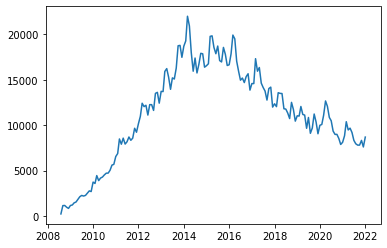

In [13]:
plt.plot(clean_df.loc[clean_df['TAG'] == 'java']['DATE'], clean_df.loc[clean_df['TAG'] == 'java']['POSTS'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

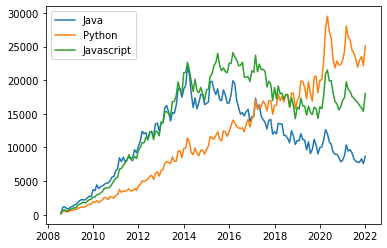

In [14]:
plt.plot(clean_df.loc[clean_df['TAG'] == 'java']['DATE'], clean_df.loc[clean_df['TAG'] == 'java']['POSTS'], label = 'Java')
plt.plot(clean_df.loc[clean_df['TAG'] == 'python']['DATE'], clean_df.loc[clean_df['TAG'] == 'python']['POSTS'], label = 'Python')
plt.plot(clean_df.loc[clean_df['TAG'] == 'javascript']['DATE'], clean_df.loc[clean_df['TAG'] == 'javascript']['POSTS'], label = 'Javascript')
plt.legend()
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

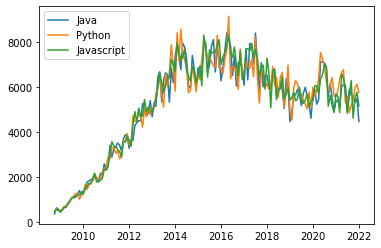

In [21]:
clean_df['AVERAGE (25)'] = clean_df.POSTS.rolling(window=25).mean()
plt.plot(clean_df.loc[clean_df['TAG'] == 'java']['DATE'], clean_df.loc[clean_df['TAG'] == 'java']['AVERAGE (25)'], label = 'Java')
plt.plot(clean_df.loc[clean_df['TAG'] == 'python']['DATE'], clean_df.loc[clean_df['TAG'] == 'python']['AVERAGE (25)'], label = 'Python')
plt.plot(clean_df.loc[clean_df['TAG'] == 'javascript']['DATE'], clean_df.loc[clean_df['TAG'] == 'javascript']['AVERAGE (25)'], label = 'Javascript')
plt.legend()
plt.show()


In [22]:
clean_df

,DATE,TAG,POSTS,AVERAGE (25)
0,2008-07-01,c#,3,NaN
1,2008-08-01,assembly,8,NaN
2,2008-08-01,javascript,164,NaN
3,2008-08-01,c,83,NaN
4,2008-08-01,python,122,NaN
...,...,...,...,...
2239,2022-01-01,r,4457,4890.48
2240,2022-01-01,go,892,4760.12
2241,2022-01-01,python,25098,5757.72
2242,2022-01-01,ruby,501,5162.12


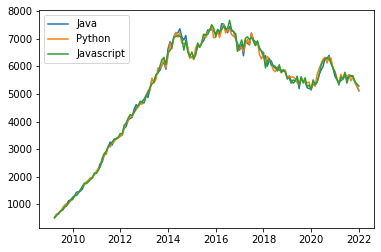

In [23]:
clean_df['AVERAGE (100)'] = clean_df.POSTS.rolling(window=100).mean()
plt.plot(clean_df.loc[clean_df['TAG'] == 'java']['DATE'], clean_df.loc[clean_df['TAG'] == 'java']['AVERAGE (100)'], label = 'Java')
plt.plot(clean_df.loc[clean_df['TAG'] == 'python']['DATE'], clean_df.loc[clean_df['TAG'] == 'python']['AVERAGE (100)'], label = 'Python')
plt.plot(clean_df.loc[clean_df['TAG'] == 'javascript']['DATE'], clean_df.loc[clean_df['TAG'] == 'javascript']['AVERAGE (100)'], label = 'Javascript')
plt.legend()
plt.show()